https://www.kaggle.com/c/dogs-vs-cats,  
book : 케라스 창시자에게 배우는 딥러닝

# 데이터셋 구조(처음)
- train.zip
    - cat.0.jpg ...
    - cat.12499.jpg
    - dog.0.jpg ...
    - dog.12499.jpg
    
- test1.zip
    - 1.jpg ...
    - 12499.jpg ...

                
  

In [1]:
import tensorflow as tf
import os
import numpy as np

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework

1 Physical CPU, 1 Logical CPU


C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensor

In [5]:
# train 구성 : 고양이 12500, 개 12500
import os
import shutil

original_dataset_dir = 'D:/dogs-vs-cats/train/train'
base_dir = 'D:/dogs-vs-cats/datasets'
os.mkdir(base_dir)

# datasets/train
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
# datasets/validation
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
# datasets/test
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# train/cats
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
# train/dogs
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

# validation/cats
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
# validation/dogs
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

# test/cats
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
# test/dogs
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

# cat.0 ~ cat.999 : train/cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
# cat.1000 ~ cat.1499 : validation/cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
# cat.1000 ~ cat.1499 : test/cats    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# dog.0 ~ dog.999 : train/dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
# dog.1000 ~ dog.1499 : validation/dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
# dog.1000 ~ dog.1499 : test/dogs   
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 데이터셋 구조(최종)
## train 안에 있는 데이터만 사용함
## train : 개,고양이 500장
## validation : 개,고양이 500장
## test : 개,고양이 500장

- datasets
    - test
        - cats
        - dogs 
    - train
        - cats
        - dogs
    - validation 
        - cats
        - dogs

In [7]:
# 이미지 [0,1]로 조정 및 resize
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
# 모델 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.InputLayer(input_shape=(150, 150, 3)))
model.add(layers.Conv2D(16, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)       

In [16]:
# 모델 학습(최적화 함수, loss function 설정)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)

In [17]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

reLR = ReduceLROnPlateau(patience=5,verbose=1,factor=0.5) #learning rate scheduler
es = EarlyStopping(patience=8, verbose=1)
checkpointer = ModelCheckpoint(filepath='D:/dogs-vs-cats/datasets/model.weights.best1.hdf5', verbose = 1, save_best_only=True)

# 모델 학습 횟수(epochs) 지정 및 모델 학습 시작 
history = model.fit_generator(
    train_generator, 
    epochs=30,
    steps_per_epoch=100, 
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[checkpointer,es,reLR]
)

Epoch 1/30
100/100 [==============================] - 30s 295ms/step - loss: 0.7194 - acc: 0.5120 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 22s 224ms/step - loss: 0.6950 - acc: 0.5310 - val_loss: 0.6923 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 22s 221ms/step - loss: 0.6863 - acc: 0.5560 - val_loss: 0.6730 - val_acc: 0.6210
Epoch 4/30
100/100 [==============================] - 22s 224ms/step - loss: 0.6518 - acc: 0.6080 - val_loss: 0.6484 - val_acc: 0.6250
Epoch 5/30
100/100 [==============================] - 22s 225ms/step - loss: 0.6206 - acc: 0.6610 - val_loss: 0.6136 - val_acc: 0.6560
Epoch 6/30
100/100 [==============================] - 22s 221ms/step - loss: 0.5727 - acc: 0.6885 - val_loss: 0.6293 - val_acc: 0.6370
Epoch 7/30
100/100 [==============================] - 22s 221ms/step - loss: 0.5304 - acc: 0.7290 - val_loss: 0.6116 - val_acc: 0.6570
Epoch 8/30
100/100 [==============================] - 2

In [18]:
model.save('D:/dogs-vs-cats/datasets/cat_dog_1.h5')

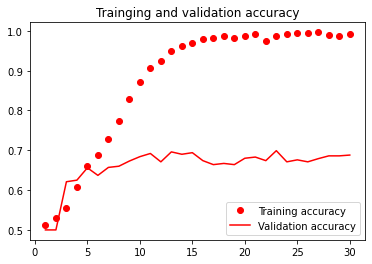

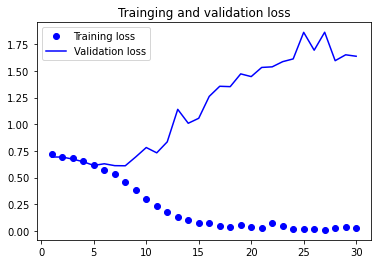

In [25]:
# 정확도와 loss 값 시각화
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# accuracy(train과 validation)
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Trainging and validation accuracy')
plt.legend()
plt.figure()

# loss(train과 validation)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainging and validation loss')
plt.legend()

plt.show()